# [3주차 - Day5] Weekly Mission

## Mission 1. Netfilx and Code

### Mandatory Part
- 넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오:


#### 한국 작품은 총 얼마나 있는가?
- country column을 기준으로 한다.
- "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

In [ ]:
import pandas as pd
import numpy as np

In [7]:
netflix = pd.read_csv('./netflix_titles.csv')

netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [16]:
sum(netflix['country'] == "South Korea")

#한국 작품은 총 183개 존재

183

### Bonus Part
- 넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오:

#### 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
- country column을 기준으로 한다.
- 단일 국가인 경우를 기준으로 결과를 구해보자.

In [74]:
netflix_one_country = netflix[netflix['country'].str.contains(',')==False]

count = netflix_one_country['country'].groupby(netflix_one_country['country']).count()
count = count.sort_values(ascending=False)

count.head(1)

#United States가 2555개로 가장 많은 작품이 존재한다.

country
United States    2555
Name: country, dtype: int64

## Mission 2. 가즈아!

### Mandatory Part
- 다음 데이터가 주어졌을 때 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.


- 선의 색깔은 노란색(#f2a900) 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 Open Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

In [222]:
BitCoin = pd.read_csv('./BitCoin.csv')

BitCoin.head(5)

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000


In [223]:
BitCoin.dtypes

Unnamed: 0      int64
Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap      int64
dtype: object

In [224]:
BitCoin = BitCoin.drop('Unnamed: 0',axis=1)
BitCoin

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000
...,...,...,...,...,...,...,...
1604,2013-02-05,116.38,125.60,92.28,105.21,6.722784e+06,1292190000
1605,2013-01-05,139.00,139.89,107.72,116.99,8.026719e+06,1542820000
1606,2013-04-30,144.00,146.93,134.05,139.00,8.312655e+06,1597780000
1607,2013-04-29,134.44,147.49,134.00,144.54,7.757951e+06,1491160000


In [244]:
BitCoin['Date'] = pd.to_datetime(BitCoin['Date'], format="%Y-%m-%d")
BitCoin['Date'] = BitCoin['Date'].dt.date
BitCoin

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-01-05,139.00,139.89,107.72,116.99,8.026719e+06,1542820000
1,2013-01-06,128.81,129.78,127.20,129.30,7.521960e+06,1445800000
2,2013-01-07,97.51,97.66,86.30,88.05,5.759986e+06,1107130000
3,2013-01-08,106.21,108.00,103.01,104.00,6.348195e+06,1220190000
4,2013-01-09,135.14,145.81,134.81,138.34,8.179728e+06,1572230000
...,...,...,...,...,...,...,...
1604,2017-12-05,1845.76,1856.15,1694.01,1724.24,7.409840e+08,30131100000
1605,2017-12-06,2953.22,2997.26,2518.56,2659.63,2.569530e+09,48391200000
1606,2017-12-07,2332.77,2423.71,2275.14,2398.84,1.117410e+09,38355900000
1607,2017-12-08,3650.63,3949.92,3613.70,3884.71,2.219590e+09,60242100000


In [245]:
BitCoin.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap      int64
dtype: object

In [246]:
BitCoin = BitCoin.sort_values(by="Date")
BitCoin = BitCoin.reset_index(drop=True)
BitCoin

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-01-05,139.00,139.89,107.72,116.99,8.026719e+06,1542820000
1,2013-01-06,128.81,129.78,127.20,129.30,7.521960e+06,1445800000
2,2013-01-07,97.51,97.66,86.30,88.05,5.759986e+06,1107130000
3,2013-01-08,106.21,108.00,103.01,104.00,6.348195e+06,1220190000
4,2013-01-09,135.14,145.81,134.81,138.34,8.179728e+06,1572230000
...,...,...,...,...,...,...,...
1604,2017-12-05,1845.76,1856.15,1694.01,1724.24,7.409840e+08,30131100000
1605,2017-12-06,2953.22,2997.26,2518.56,2659.63,2.569530e+09,48391200000
1606,2017-12-07,2332.77,2423.71,2275.14,2398.84,1.117410e+09,38355900000
1607,2017-12-08,3650.63,3949.92,3613.70,3884.71,2.219590e+09,60242100000


In [261]:
from datetime import date
def Five_MA(df):
    Start = df[df['Date'] == date(2016, 6, 1)].index[0]

    Idx = 0

    MA_Date = []
    MA_Price = []

    while df['Date'][Start+(Idx+1)*5] < date(2017, 6, 30):
        MA_Date.append(df['Date'][Start+Idx*5])
        MA_Price.append(sum(df['Open'][Start+Idx*5:Start+(Idx+1)*5])/5)
        Idx += 1
    return MA_Date, MA_Price

In [266]:
BC_MA_Date, BC_MA_Price = Five_MA(BitCoin)

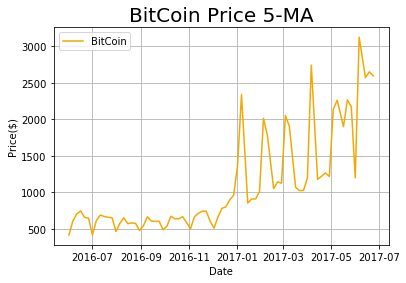

In [272]:
import matplotlib.pyplot as plt
plt.plot(BC_MA_Date,BC_MA_Price,'#f2a900',label='BitCoin')
plt.xlabel('Date')
plt.ylabel('Price($)')
plt.grid(True)
plt.title('BitCoin Price 5-MA',fontSize=20)
plt.legend()

plt.show()

### Bonus Part

- 위에 주어진 데이터와 더불어 다음 데이터도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에 그려주세요.

- 선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 Open Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [217]:
ETH = pd.read_csv('./ETH_day.csv')
ETH.head(5)

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57


In [218]:
ETH.dtypes

Date           object
Symbol         object
Open          float64
High          float64
Low           float64
Close         float64
Volume ETH    float64
Volume USD    float64
dtype: object

In [252]:
ETH['Date'] = pd.to_datetime(ETH['Date'],format="%Y-%m-%d")
ETH['Date'] = ETH['Date'].dt.date
ETH


,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57
...,...,...,...,...,...,...,...,...
1433,2016-05-13,ETHUSD,10.20,11.59,10.20,10.69,1769.71,18923.55
1434,2016-05-12,ETHUSD,10.43,12.00,9.92,10.20,2072.56,22183.39
1435,2016-05-11,ETHUSD,9.68,10.47,9.68,10.43,3052.51,30978.11
1436,2016-05-10,ETHUSD,9.98,9.98,9.36,9.68,672.06,6578.20


In [259]:
ETH = ETH.sort_values(by="Date")
ETH = ETH.reset_index(drop=True)
ETH

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2016-05-09,ETHUSD,12.00,12.00,9.36,9.98,1317.90,12885.06
1,2016-05-10,ETHUSD,9.98,9.98,9.36,9.68,672.06,6578.20
2,2016-05-11,ETHUSD,9.68,10.47,9.68,10.43,3052.51,30978.11
3,2016-05-12,ETHUSD,10.43,12.00,9.92,10.20,2072.56,22183.39
4,2016-05-13,ETHUSD,10.20,11.59,10.20,10.69,1769.71,18923.55
...,...,...,...,...,...,...,...,...
1433,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57
1434,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
1435,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
1436,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44


In [269]:
ETH_MA_Date, ETH_MA_Price = Five_MA(ETH)

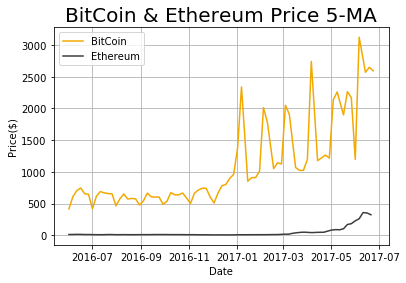

In [273]:
plt.plot(BC_MA_Date,BC_MA_Price,'#f2a900',label='BitCoin')
plt.plot(ETH_MA_Date,ETH_MA_Price,'#3c3c3d',label='Ethereum')
plt.xlabel('Date')
plt.ylabel('Price($)')
plt.grid(True)
plt.title('BitCoin & Ethereum Price 5-MA',fontSize=20)
plt.legend()

plt.show()